# Tree Visualization: Using iris dataset, save model using joblib

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import joblib

### Import Dataset

In [14]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create the model

In [15]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, criterion='gini')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

### Save the model

In [17]:
joblib.dump(clf, 'model.joblib')

['model.joblib']

### Model evaluation

Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


<Axes: >

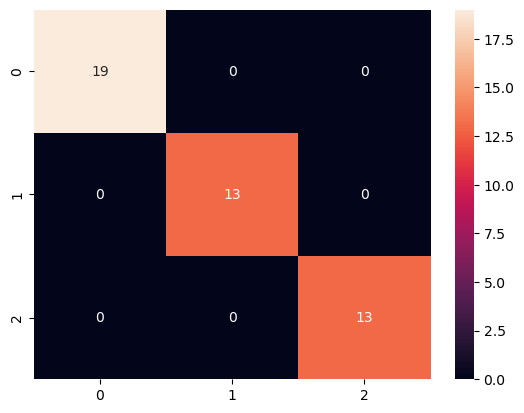

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

### Tree Visulization: using joblib saved model

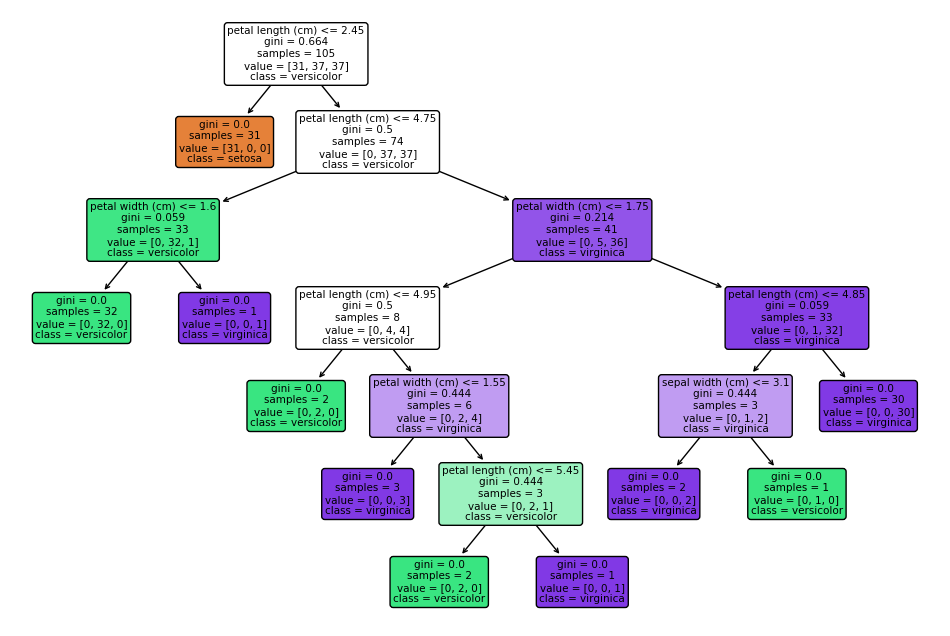

In [19]:
model = joblib.load('model.joblib')
# Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(model,
               feature_names=iris.feature_names,
               class_names=list(iris.target_names),
               filled=True,
               rounded=True)
plt.show()